In [21]:
import json
import pandas
import os
import sys
import re

In [22]:
sys.path

['/home/zinat/Documents/NLP/segan',
 '/home/zinat/anaconda/anaconda/lib/python37.zip',
 '/home/zinat/anaconda/anaconda/lib/python3.7',
 '/home/zinat/anaconda/anaconda/lib/python3.7/lib-dynload',
 '',
 '/home/zinat/anaconda/anaconda/lib/python3.7/site-packages',
 '/home/zinat/anaconda/anaconda/lib/python3.7/site-packages/IPython/extensions',
 '/home/zinat/.ipython']

In [23]:
os.getcwd()
pandas.__version__


'0.25.1'

In [24]:
#Further preprocessing
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)

import nltk
#import nltk.stem as stemmer
#nltk.download('wordnet')

In [25]:
#wordcloud imports
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image


In [26]:
#Loading data

def data_load(path):
    data = []

    for line in open(path, 'r'):
        data.append(json.loads(line))
    
    result=pandas.DataFrame(data)
    result.head()
    return result

In [27]:
def filtering_keys(df, key_list):
    df=df[key_list]
    return df

In [28]:
def remove_punctuation(df):
    df['news_content']=df['news_content'].map(lambda x: re.sub(r'\W+',' ',x))
    df['news_content']=df['news_content'].map(lambda x: re.sub(r'\d+','0',x))
    df['news_content']=df['news_content'].map(lambda x:x.lower())
    df['news_content']=df['news_content'].map(lambda x: re.sub('[_-]',' ',x))
    #df['news_content']=df['news_content'].map(lambda x:x.replace('\n',' ').replace('\r',' ')
    #df['news_content'].head()
    #print(df)
    return df

In [29]:
def create_word_cloud(string):
    #maskArray = npy.array(Image.open("./cloud.png"))
    print(string[1:100])
    cloud = WordCloud(width = 800, height = 800, background_color = "white", max_words = 5000, stopwords = set(STOPWORDS))
    cloud.generate(string)
    #cloud.toimage()
    #cloud.to_file("wordCloud.png")
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show() 
#dataset = dataset.lower()



In [30]:
def visual_cloud(dataset):
    news_content = ''
    news_content += ','.join(list(dataset['news_content'].values))
    print(news_content[1:100])
    create_word_cloud(news_content)


In [31]:
stemmer = SnowballStemmer("english")
#stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = ''
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            #result.append(lemmatize_stemming(token))
            result+=''.join(lemmatize_stemming(token))+" "
    #print(result)
    return result

In [32]:
def preprocess_dataset(df):
    df['news_content']=df['news_content'].map(lambda x: preprocess(x))
    return df


#preprocess(data_trustworthy['news_content'][0])

In [33]:
data_trustworthy=data_load("./Health_Misinfo_Data/data_extracted_zfinal_health_trustworthy.json")
#print(data_trustworthy.head())
list(data_trustworthy.columns)
data_trustworthy=filtering_keys(data_trustworthy,['status_id','news_content'])
#print(data_trustworthy.head())
data_trustworthy=remove_punctuation(data_trustworthy)
print(data_trustworthy['news_content'][0])
data_trustworthy=preprocess_dataset(data_trustworthy)

are these really bad foods for type 0 diabetes if you have diabetes you may be worried about adding certain foods to your plate but are picks like red meat coffee and chocolate really bad for people with diabetes no one food is always off limits when it comes to eating with diabetes says lori zanini rd cde creator of the online training program for the love of diabetes who is based in manhattan beach california in fact i recommend my clients indulge in their favorite foods on occasion because it promotes better success and better blood glucose management in the long run if you are always told that you can never have a particular food you may end up wanting it more restriction may also lead to eating a too large portion when you finally do indulge notes zanini the keys to enjoying your favorite foods with diabetes are moderation and proper meal planning also remember to prioritize adding nutrient rich foods such as whole grains try steel cut or old fashioned oatmeal brown rice and quino

suzann robotti special everyday health doctor mother bear chang cours life shoot pregnant coupl month treat week mixtur pill shot wide prove safe synthet estrogen give million women earli unproven assumpt estrogen improv pregnanc outcom call wonder drug exposur utero make know daughter year mother receiv fate shoot american journal obstetr gynecolog publish research show ineffect support healthi pregnanc stop mother doctor hundr prescrib cancer effect daughter medic tragedi slow motion year expos utero cluster teenag girl diagnos rare form vagin cervic cancer call clear cell adenocarcinoma mother articl york time report studi england journal medicin tie rare form cancer exposur utero studi urg doctor pregnant women mother write assur give stilbestrol safe riski stilbestrol synthet estrogen simpli daughter infertil effect long term damag exposur slow discov year exposur daughter discov abnorm reproduct organ infertil miscarriag common daughter complet list detail damag health effect cau

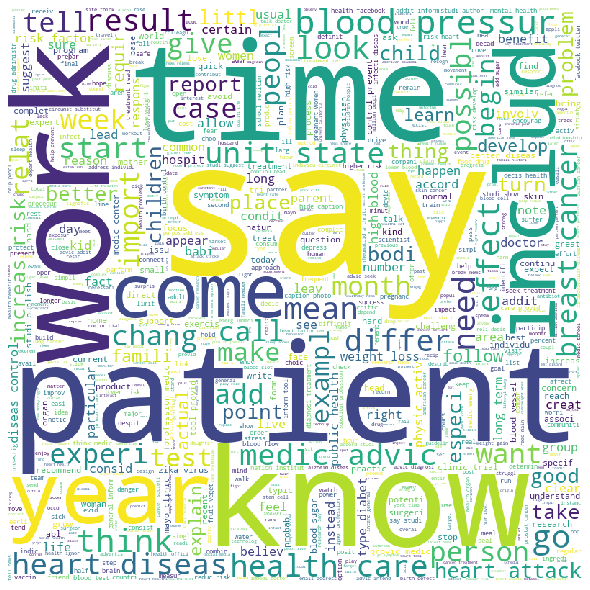

In [34]:
#check data
print(data_trustworthy['news_content'][564])
visual_cloud(data_trustworthy)

In [35]:
#filewrite
with open('raw_text.txt', "w") as input_file, open('response_text.txt', "w") as responsefile:
    for i in range (0,len(data_trustworthy)):
        input_file.write("{0}\t{1}\n".format(int(data_trustworthy['status_id'][i]), data_trustworthy['news_content'][i]))
        responsefile.write("{0}\t{1}\n".format(int(data_trustworthy['status_id'][i]),int(1)))
        #input_file.write("%s\t %s\n" % entries['status_id'] %entries['news_content'])
                         

In [36]:
data_dubious=data_load("./Health_Misinfo_Data/data_extracted_zfinal_health_dubiousClassified.json")
#print(data_trustworthy.head())
list(data_dubious.columns)
data_dubious=filtering_keys(data_dubious,['status_id','news_content'])
#print(data_trustworthy.head())
data_dubious=remove_punctuation(data_dubious)
print(data_dubious['news_content'][0])
data_dubious=preprocess_dataset(data_dubious)

the tomato is one of the most nutritious foods in the world which has antioxidants that protect the body from dangerous diseases combat the effects of free radicals and delay the main signs of aging people do not consume the amounts due to this food tomato juice is a solution suggested by expert nutritionists to replace this lack of vegetable in everyday life a way to take advantage of its beneficial properties through the juices we consume adding other flavors in the daily diet tomato juice also has the enormous advantage of allowing you to make the most of the plant s capacity preventing the formation of cancer with its antioxidant effects leveling blood cholesterol strengthening cardiovascular health and slowing down aging of the benefits undoubtedly there are many nutrients that this food can provide the body is rich in lycopene which acts as an anticancer agent if you need to convince yourself a little more about the consumption of tomato juice here we list the main benefits you c

women hate word spring mind cellulit agre accord statist women face problem cellulit problem make women embarrass bodi horribl cellulit local increas cell violat adipos tissu main caus cellulit action femal hormon estrogen fact number factor caus cellulit hormon malnutrit dehydr unhealthi lifestyl genet face cellulit thigh hip butt abdomen area look like orang peel cottag chees nowaday procedur cosmet product help reduc cellulit unfortun method live expect harm health luckili effect use skin extrem easi simpl cellulit ingredi kitchen appl cider vinegar fantast natur remedi help fight cellulit sourc magnesium calcium potassium miner stimul circul elimin excess fluid bodi appl cider vinegar help lose weight reduc cellulit prevent bloat recip cellulit need ingredi appl cider vinegar water honey need appl cider vinegar part water littl honey mixtur result mixtur affect area work minut rins warm water repeat procedur twice perfect skin effect cellulit need combin equal part water appl cider

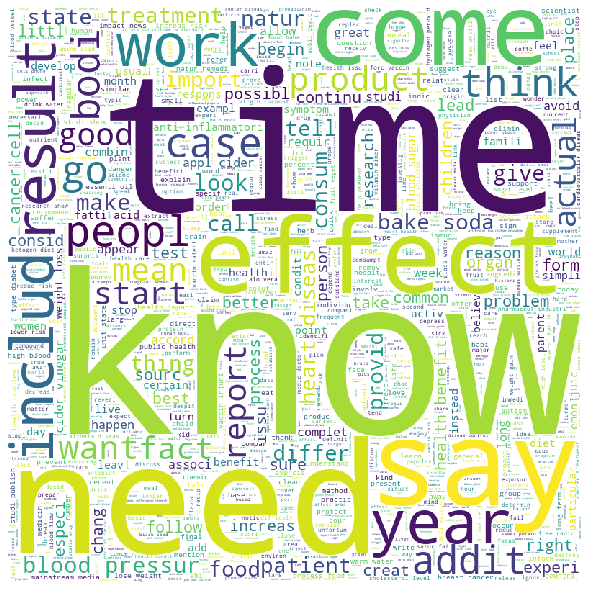

In [38]:

#check data
print(data_dubious['news_content'][564])
visual_cloud(data_dubious)

In [39]:
with open('raw_text.txt', "a") as input_file, open('response_text.txt', "a") as responsefile:
    for i in range (0,len(data_dubious)):
        input_file.write("{0}\t{1}\n".format(int(data_dubious['status_id'][i]), data_dubious['news_content'][i]))
        responsefile.write("{0}\t{1}\n".format(int(data_dubious['status_id'][i]),int(0)))
        #input_file.write("%s\t %s\n" % entries['status_id'] %entries['news_content'])


In [ ]:
data = []

for line in open('./Health_Misinfo_Data/data_extracted_zfinal_health_dubiousClassified.json', 'r'):
    data.append(json.loads(line))

print(data[0].keys())
i=0
keys_to_extract=['status_id','news_content']

sub_data=[]
for entries in data:
    sub_data.append({k: entries[k] for k in keys_to_extract if k in entries})
    
for entries in sub_data:
    entries['news_content']=entries['news_content'].replace("\n","")
    entries['news_content']=entries['news_content'].replace("_","")
    

In [ ]:
news_content = ''
for entries in sub_data:
    news_content += ''.join(entries['news_content'])+""
news_content=news_content.lower()
create_word_cloud(news_content)


In [ ]:
with open('raw_text.txt', "a") as input_file, open('response_text.txt', "a") as responsefile:
    for entries in sub_data:
        input_file.write("{0}\t{1}\n".format(int(entries['status_id']), entries['news_content']))
        responsefile.write("{0}\t{1}\n".format(int(entries['status_id']),int(0)))


In [ ]:
#data_trustworthy.DataFrame.columns
"""
i=0
keys_to_extract=['status_id','news_content']
"""
"""
for entries in data:
    print(entries['news_content'])
    i=i+1
    if i==10:
        break
"""
"""
sub_data=[]
for entries in data:
    sub_data.append({k: entries[k] for k in keys_to_extract if k in entries})
    
for entries in sub_data:
    entries['news_content']=entries['news_content'].replace("\n","")
    entries['news_content']=entries['news_content'].replace("_","")
"""
#len(data_trustworthy)
#print(data_trustworthy['status_id'])